# Import software libraries

In [1]:
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sns                  # Perform data visualization

# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 1.19.2
- Pandas 1.1.3
- Matplotlib 3.3.2
- SciPy 1.5.2
- Scikit-learn 0.23.2
- Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]



# Load the dataset

In [2]:
# Load the dataset as a pandas DataFrame from ./seoul_bike_data/seoul_bike_data.csv
df = pd.read_csv("seoul_bike_data.csv")
df

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8389,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8390,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8391,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8392,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


# Get acquainted with the dataset

In [3]:
# View data types and see if there are missing entries.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bikes_rented  8394 non-null   int64  
 1   temp          8394 non-null   float64
 2   humidity      8394 non-null   int64  
 3   wind_speed    8394 non-null   float64
 4   visibility    8394 non-null   int64  
 5   dew_temp      8394 non-null   float64
 6   solar_rad     8394 non-null   float64
 7   rainfall      8394 non-null   float64
 8   snowfall      8394 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB


In [4]:
df.isnull().sum()

bikes_rented    0
temp            0
humidity        0
wind_speed      0
visibility      0
dew_temp        0
solar_rad       0
rainfall        0
snowfall        0
dtype: int64

# Show example records

In [5]:
# View first 10 records.
df.head(10)

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0


# Examine a general summary of statistics

In [6]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
df.describe()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
count,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000
mean,731.374792,12.812009,58.074696,1.740481,1433.226590,3.964260,0.572427,0.149261,0.077949
std,643.616638,12.108977,20.483539,1.026341,609.803729,13.242399,0.870429,1.126075,0.445800
min,2.000000,-17.800000,0.000000,0.100000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,214.000000,3.100000,42.000000,1.000000,932.250000,-5.100000,0.000000,0.000000,0.000000
50%,546.000000,13.600000,57.000000,1.500000,1690.000000,4.800000,0.010000,0.000000,0.000000
75%,1088.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.940000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Look for columns that correlate with `bikes_rented`

In [7]:
# View the correlation values for each feature compared to the label.
df.corr()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
bikes_rented,1.000000,0.563440,-0.201466,0.120961,0.213989,0.401160,0.272748,-0.128794,-0.151881
temp,0.563440,1.000000,0.165484,-0.044827,0.031410,0.914372,0.354692,0.052120,-0.218070
humidity,-0.201466,0.165484,1.000000,-0.336857,-0.549300,0.538730,-0.457904,0.237436,0.110487
wind_speed,0.120961,-0.044827,-0.336857,1.000000,0.184935,-0.182518,0.321812,-0.025538,-0.004840
visibility,0.213989,0.031410,-0.549300,0.184935,1.000000,-0.180199,0.154676,-0.169727,-0.123300
dew_temp,0.401160,0.914372,0.538730,-0.182518,-0.180199,1.000000,0.098152,0.127034,-0.149969
solar_rad,0.272748,0.354692,-0.457904,0.321812,0.154676,0.098152,1.000000,-0.074607,-0.073923
rainfall,-0.128794,0.052120,0.237436,-0.025538,-0.169727,0.127034,-0.074607,1.000000,0.008712
snowfall,-0.151881,-0.218070,0.110487,-0.004840,-0.123300,-0.149969,-0.073923,0.008712,1.000000


# Visually analyze cross correlations

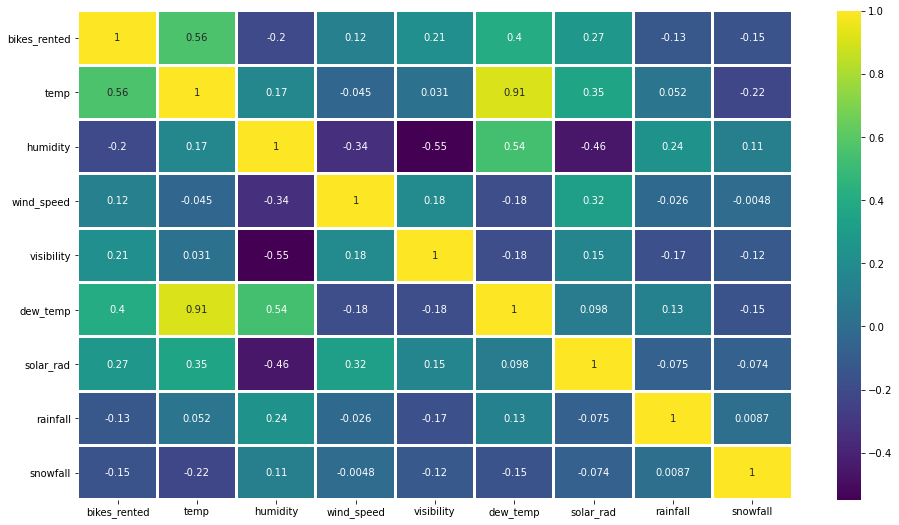

In [8]:
# Use Seaborn to plot the correlation matrix as a heatmap.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.2g', linewidths=2)
plt.show()

# Use histograms to visualize the distribution of all features

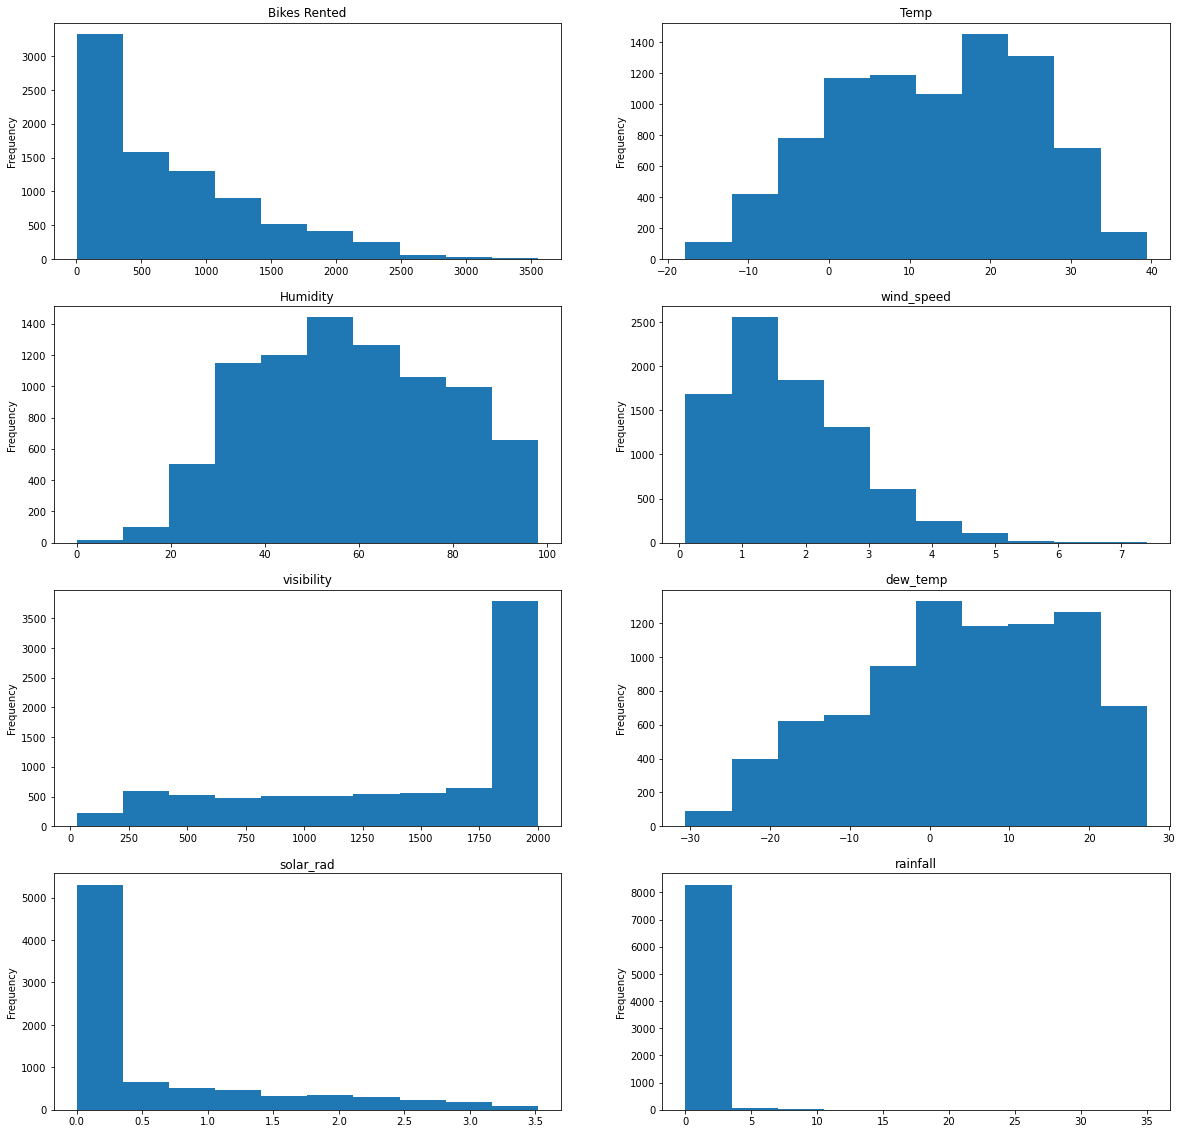

In [9]:
# Use Matplotlib to plot distribution histograms for all features.

plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
df["bikes_rented"].plot(kind="hist")
plt.title("Bikes Rented")
plt.subplot(4,2,2)
df["temp"].plot(kind="hist")
plt.title("Temp")
plt.subplot(4,2,3)
df["humidity"].plot(kind="hist")
plt.title("Humidity")
plt.subplot(4,2,4)
df["wind_speed"].plot(kind="hist")
plt.title("wind_speed")
plt.subplot(4,2,5)
df["visibility"].plot(kind="hist")
plt.title("visibility")
plt.subplot(4,2,6)
df["dew_temp"].plot(kind="hist")
plt.title("dew_temp")
plt.subplot(4,2,7)
df["solar_rad"].plot(kind="hist")
plt.title("solar_rad")
plt.subplot(4,2,8)
df["rainfall"].plot(kind="hist")
plt.title("rainfall")
plt.show()

# Split the data into training and testing sets and labels

In [10]:
# Split the training and test datasets and their labels.

# Compare the number of rows and columns in the original data to the training and test sets.

from sklearn.model_selection import train_test_split

In [11]:
df.shape

(8394, 9)

In [12]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
X.values, y.values

(array([[-5.2, 37. ,  2.2, ...,  0. ,  0. ,  0. ],
        [-5.5, 38. ,  0.8, ...,  0. ,  0. ,  0. ],
        [-6. , 39. ,  1. , ...,  0. ,  0. ,  0. ],
        ...,
        [ 2.6, 39. ,  0.3, ...,  0. ,  0. ,  0. ],
        [ 2.1, 41. ,  1. , ...,  0. ,  0. ,  0. ],
        [ 1.9, 43. ,  1.3, ...,  0. ,  0. ,  0. ]]),
 array([254, 204, 173, ..., 694, 712, 584], dtype=int64))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train.shape, y_train.shape

((6715, 8), (6715,))

# Build and test an initial linear regression model

In [16]:
# Create a linear regression model.

# Fit the model using training data and labels.

from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

# Use the holdout dataset to test the model

In [19]:
# Print the regressor model's score using the test data and labels.

lr.score(X_test,y_test)

0.4478627291734715

# Compare the first ten predictions to actual values

In [20]:
# Make predictions on the test set.

# View examples comparing actual bike rentals to predicted bike rentals.

In [21]:
lr_pred = lr.predict(X_test)

In [22]:
lr_pred[:10]

array([ 857.323119  ,  751.8098849 ,  655.08069967, 1226.26561471,
       1590.38483999,  285.88722901, 1454.77870554,  711.79165875,
        325.36163583,  598.10222996])

In [23]:
y_test[:10]

2417     946
2933    1033
7268    1255
6342    2022
5697    1697
1259     184
5622     920
2431     616
1916     388
2650     668
Name: bikes_rented, dtype: int64

# Identify outliers

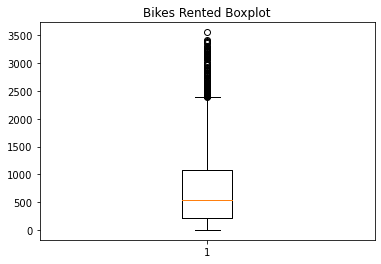

In [24]:
# Use Matplotlib to create box plot distributions for bikes rented and wind speed.

plt.boxplot(x=df.bikes_rented)
plt.title("Bikes Rented Boxplot")
plt.show()

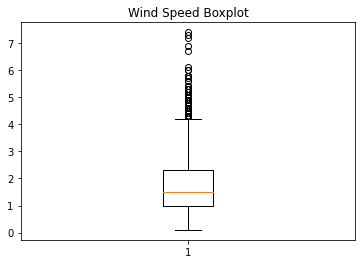

In [25]:
plt.boxplot(x=df.wind_speed)
plt.title("Wind Speed Boxplot")
plt.show()

# Examine data values in the outliers

In [26]:
# Show rows that exceed 3,500 bikes rented.
df[df["bikes_rented"] > 3500]

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
4743,3556,24.1,57,2.9,1301,15.0,0.56,0.0,0.0


In [27]:
# Show rows with wind speed greater than 6 meters per second.
df[df["wind_speed"] > 6]

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
909,146,0.7,77,6.7,692,-2.8,0.0,0.9,1.0
3108,913,21.2,35,7.4,1992,5.1,1.8,0.0,0.0
3112,1805,19.7,52,7.2,2000,9.5,0.2,0.0,0.0
3114,336,19.1,58,6.1,2000,10.6,0.0,0.0,0.0
3115,133,17.5,70,7.3,1634,11.9,0.0,0.5,0.0
6230,49,25.3,70,6.9,925,19.4,0.0,0.4,0.0


# Drop outliers from the training dataset

In [28]:
# Keep only the rows where number of bikes rented is less than 3,500.

df1 = df[df["bikes_rented"] < 3500]

df1

# Keep only the rows where the wind speed is less than 6 m/s.

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8389,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8390,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8391,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8392,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [29]:
df2 = df1[df1["wind_speed"] < 6]

In [30]:
df2

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8389,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8390,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8391,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8392,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [31]:
df2.reset_index(drop=True)

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8380,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8381,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8382,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8383,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [32]:
#df2.to_csv("part2.csv",index=False)

# Compare the scale and distribution of `bikes_rented` and `wind_speed`

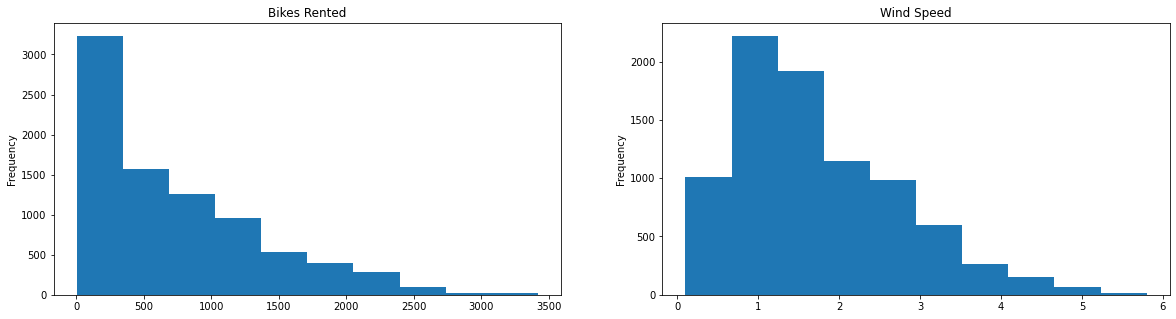

In [33]:
# Define a function that uses Matplotlib to visually compare the scale and distribution of bikes rented and wind speed.
    
# Call the function. 

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df2["bikes_rented"].plot(kind="hist")
plt.title("Bikes Rented")
plt.subplot(1,2,2)
df2["wind_speed"].plot(kind="hist")
plt.title("Wind Speed")

plt.show()

# Transform `bikes_rented` and `wind_speed`, and compare results

In [34]:
df2 = pd.read_csv("part2.csv")

In [35]:
# Apply a log transformation (np.log) to scale bikes rented and wind speed.

# Compare scale and distribution of bikes rented and wind speed by calling the function you defined earlier.

df2.head()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [36]:
df3 = df2.copy()

In [37]:
df3["log_wind_speed"] = np.log(df3["wind_speed"])

In [38]:
df3

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall,log_wind_speed
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.788457
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,-0.223144
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.000000
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,-0.105361
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.832909
...,...,...,...,...,...,...,...,...,...,...
8380,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.955511
8381,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.832909
8382,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,-1.203973
8383,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.000000


In [39]:
df3["log_bikes_rented"] = np.log(df3["bikes_rented"])

In [40]:
df3

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall,log_wind_speed,log_bikes_rented
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.788457,5.537334
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,-0.223144,5.318120
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.000000,5.153292
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,-0.105361,4.672829
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.832909,4.356709
...,...,...,...,...,...,...,...,...,...,...,...
8380,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.955511,6.910751
8381,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.832909,6.638568
8382,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,-1.203973,6.542472
8383,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.000000,6.568078


In [41]:
df3.drop(["bikes_rented","wind_speed"], axis=1, inplace=True)

In [42]:
df3.head()

,temp,humidity,visibility,dew_temp,solar_rad,rainfall,snowfall,log_wind_speed,log_bikes_rented
0,-5.2,37,2000,-17.6,0.0,0.0,0.0,0.788457,5.537334
1,-5.5,38,2000,-17.6,0.0,0.0,0.0,-0.223144,5.318120
2,-6.0,39,2000,-17.7,0.0,0.0,0.0,0.000000,5.153292
3,-6.2,40,2000,-17.6,0.0,0.0,0.0,-0.105361,4.672829
4,-6.0,36,2000,-18.6,0.0,0.0,0.0,0.832909,4.356709


In [43]:
X = df3.iloc[:,0:8]
y = df3.iloc[:,8]

In [44]:
X.values, y.values

(array([[-5.20000000e+00,  3.70000000e+01,  2.00000000e+03, ...,
          0.00000000e+00,  0.00000000e+00,  7.88457360e-01],
        [-5.50000000e+00,  3.80000000e+01,  2.00000000e+03, ...,
          0.00000000e+00,  0.00000000e+00, -2.23143551e-01],
        [-6.00000000e+00,  3.90000000e+01,  2.00000000e+03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 2.60000000e+00,  3.90000000e+01,  1.96800000e+03, ...,
          0.00000000e+00,  0.00000000e+00, -1.20397280e+00],
        [ 2.10000000e+00,  4.10000000e+01,  1.85900000e+03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.90000000e+00,  4.30000000e+01,  1.90900000e+03, ...,
          0.00000000e+00,  0.00000000e+00,  2.62364264e-01]]),
 array([5.53733427, 5.31811999, 5.15329159, ..., 6.54247196, 6.56807791,
        6.36990098]))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_train.shape, y_train.shape

((6708, 8), (6708,))

In [47]:
X_train

,temp,humidity,visibility,dew_temp,solar_rad,rainfall,snowfall,log_wind_speed
3357,14.6,42,2000,1.8,0.00,0.0,0.0,-0.693147
5147,20.7,58,2000,12.1,0.00,0.0,0.0,0.405465
1433,-1.7,91,167,-2.9,0.00,0.0,3.0,0.095310
4258,21.2,52,1856,10.9,0.55,0.0,0.0,1.280934
751,-3.2,69,1249,-8.0,0.00,0.0,0.0,-0.693147
...,...,...,...,...,...,...,...,...
4373,26.5,43,1671,12.8,2.36,0.0,0.0,1.360977
7891,11.3,77,433,7.4,0.00,0.0,0.0,-0.105361
4859,23.9,72,1098,18.5,0.00,0.0,0.0,-0.223144
3264,11.2,31,1299,-5.3,1.59,0.0,0.0,0.530628


# Build and test a new linear regression model

In [48]:
# Create a linear regression model and fit it using the transformed training data.

# Print the regressor model's score using the test data and labels.

In [49]:
lr2 = LinearRegression()

In [50]:
lr2.fit(X_train,y_train)

LinearRegression()

# Compare the first ten predictions to actual values for the new model

In [51]:
# Make predictions on the test set.

# View examples comparing actual bike rentals to predicted bike rentals.

lr2_pred = lr2.predict(X_test)

In [52]:
lr2_pred[:10]

array([6.34222077, 5.50079794, 5.80446502, 6.58271609, 4.91259081,
       6.11679542, 5.368478  , 5.67791335, 5.80553165, 5.23262077])

In [53]:
y_test[:10]

7351    7.227662
3608    6.700731
8026    6.253829
4382    7.210818
244     3.828641
8349    6.493754
2730    5.817111
8202    6.684612
2812    6.629363
7918    5.241747
Name: log_bikes_rented, dtype: float64

# Convert the bike rentals back to their initial scale

In [54]:
# Call math.exp to convert bikes rented back to their initial scale.

# View examples comparing actual bike rentals to predicted bike rentals.

import math

In [55]:
lr2_pred

array([6.34222077, 5.50079794, 5.80446502, ..., 6.15673394, 6.19953729,
       7.56554275])

In [56]:
np.exp(lr2_pred)

array([ 568.05643407,  244.88726037,  331.77765075, ...,  471.88435189,
        492.521094  , 1930.51629143])